# Fitting formula of power spectrum ratio

Here, we present the fitting formula of power spectrum ratio between full physics and dark-matter only runs. The full description is found in Appendix A of Osato, Liu, and Haiman (2020).

The functional form of the fitting formula is given as
\\[ C_\kappa^\mathrm{baryon} (\ell) / C_\kappa^\mathrm{DMO} (\ell)  =
\frac{1+(\ell/\ell_{s1})^{\alpha_1}}{1+(\ell/\ell_{s2})^{\alpha_2}} , \\]
where $\ell_{s1}$, $\ell_{s2}$, $\alpha_1$, and $\alpha_2$ are free parameters.

First, we load modules.

In [1]:
import numpy as np
from scipy.interpolate import splev, splrep
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Then, we define the fitting function, load the table of the free parameters, and show redshifts.

In [2]:
def fitting_func(ell, ell_s1, ell_s2, alpha1, alpha2):
    R = (1.0+(ell/ell_s1)**alpha1)/(1.0+(ell/ell_s2)**alpha2)

    return R


d = np.loadtxt("fitting_parameters.dat")

zs = d[:, 0]
ell_s1 = d[:, 1]
ell_s2 = d[:, 2]
alpha1 = d[:, 3]
alpha2 = d[:, 4]

print("redshifts:", zs)

redshifts: [0.034467 0.069515 0.105182 0.14151  0.178545 0.216332 0.254921 0.294363
 0.334713 0.376027 0.418368 0.461799 0.506387 0.552205 0.599329 0.647838
 0.697818 0.749361 0.802561 0.857522 0.914352 0.973168 1.034093 1.09726
 1.162811 1.230896 1.301678 1.37533  1.45204  1.532007 1.615449 1.702597
 1.793703 1.889038 1.988896 2.093596 2.203481 2.318928 2.440344 2.568175]


There are only 40 source redshifts. Thus, for arbitrary redshifts, the parameters are interpolated with respect to the redshift.

In [3]:
# Set up splines
ell_s1_spl = splrep(zs, ell_s1)
ell_s2_spl = splrep(zs, ell_s2)
alpha1_spl = splrep(zs, alpha1)
alpha2_spl = splrep(zs, alpha2)


def spectrum_ratio(ell, z):
    ell_s1, ell_s2 = splev(z, ell_s1_spl), splev(z, ell_s2_spl)
    alpha1, alpha2 = splev(z, alpha1_spl), splev(z, alpha2_spl)

    return fitting_func(ell, ell_s1, ell_s2, alpha1, alpha2)

Finally, we plot the fitting formula for arbitrary redshifts.

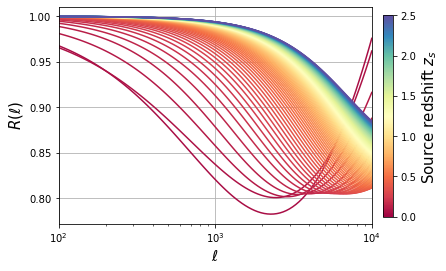

In [4]:
# Plot results
ell = np.logspace(2.0, 4.0, 100)
z = np.linspace(0.05, 2.5, 100)


fig = plt.figure()
cmap = mpl.cm.get_cmap('Spectral')
norm = mpl.colors.Normalize(vmin=0.0, vmax=2.5)

for zi in z:
    plt.plot(ell, spectrum_ratio(ell, zi), c=cmap(norm(zi)))

plt.xscale('log')
plt.xlim(1e2, 1e4)
plt.xlabel(r'$\ell$', fontsize=15)
plt.ylabel(r'$R (\ell)$', fontsize=15)
plt.grid()

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.875, 0.15, 0.025, 0.7])

cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
cbar.set_label(r"Source redshift $z_s$", fontsize=15)